# Pruebas lecturas archivos spss  
  

Cargamos las librerias necesarias, paso tipico en python

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# print(pd.__version__)
# Configuro estilo seaborn
sns.set_theme(style='ticks', context='talk', palette='tab10')

# Suprimo los warnings
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))

from ydata_profiling import ProfileReport

La libreria *pandas* puede leer archivos *.sav*  que son del software spss.  
Estos archivos son comparables a un **dataframe** de R o pandas  
En este caso leemos la "Base_Septiembre.sav"

In [49]:
df = pd.read_spss("Base_Septiembre.sav")
df

P2        P3a                                                 P4  \
0    Masculino      18-29       Nivel Primario, ya sea completo o incompleto   
1    Masculino      18-29       Nivel Primario, ya sea completo o incompleto   
2    Masculino      30-49       Nivel Primario, ya sea completo o incompleto   
3    Masculino      30-49       Nivel Primario, ya sea completo o incompleto   
4    Masculino      30-49       Nivel Primario, ya sea completo o incompleto   
..         ...        ...                                                ...   
450   Femenino  Más de 50  Nivel Universitario o Terciario, ya sea comple...   
451   Femenino  Más de 50  Nivel Universitario o Terciario, ya sea comple...   
452   Femenino  Más de 50  Nivel Universitario o Terciario, ya sea comple...   
453   Femenino  Más de 50  Nivel Universitario o Terciario, ya sea comple...   
454   Femenino  Más de 50  Nivel Universitario o Terciario, ya sea comple...   

                                                  P4.1  \
0    Sergio Massa y Agustín Rossi del Frente de Tod...   
1    Javier Milei y Victoria Villarruel de La Liber...   
2                                En blanco/ No votaría   
3    Sergio Massa y Agustín Rossi del Frente de Tod...   
4                                    Patricia Bullrich   
..                                                 ...   
450  Javier Milei y Victoria Villarruel de La Liber...   
451                              En blanco/ No votaría   
452                                  Patricia Bullrich   
453                                  Patricia Bullrich   
454  Sergio Massa y Agustín Rossi del Frente de Tod...   

                                         P5  \
0    Leandro Santoro de Unión por la Patria   
1                      No sabe/ no contesta   
2                     En blanco/ No votaría   
3    Leandro Santoro de Unión por la Patria   
4                     Jorge Macri de Juntos   
..                                      ...   
450      Ramiro Marra de la Libertad avanza   
451                   En blanco/ No votaría   
452                   Jorge Macri de Juntos   
453                   Jorge Macri de Juntos   
454  Leandro Santoro de Unión por la Patria   

                                                    P6  \
0    Sergio Massa y Agustín Rossi del Frente de Tod...   
1                                En blanco/ No votaría   
2                                                 Otro   
3    Javier Milei y Victoria Villarruel de La Liber...   
4           Patricia Bullrich por Juntos por el Cambio   
..                                                 ...   
450  Javier Milei y Victoria Villarruel de La Liber...   
451                                  Horacio R Larreta   
452                                  Horacio R Larreta   
453                              En blanco/ No votaría   
454  Sergio Massa y Agustín Rossi del Frente de Tod...   

                                    P7  Ponde  Ponde2  Sociodemografico  \
0         Vanina Biasi o Adaro del FIT    1.7    6.84               2.0   
1                En blanco/ No votaría    1.8    7.14               2.0   
2         Vanina Biasi o Adaro del FIT    0.8    4.41               1.1   
3                    M Lousteau de JXC    1.1    4.31               1.1   
4    No sabe/ No tiene opinión formada    1.0    4.21               1.1   
..                                 ...    ...     ...               ...   
450                 Jorge Macri de JXC    0.9    3.60               0.8   
451              En blanco/ No votaría    0.9    3.40               0.8   
452                 Jorge Macri de JXC    0.8    3.20               0.8   
453                 Jorge Macri de JXC    0.8    3.20               0.8   
454             Leandro Santoro de UPX    0.9    3.30               0.8   

     PondeJdg  SoloJGB  EdadmasJGB  EdadJGB  
0         1.7     0.78         2.2     0.78  
1         1.7     1.00         2.3     1.00  
2         0.8     0.78         0.9     0.78  
3      

Esto parece ser un crudo de encuestas, que es lo que estamos buscando para analizar, tendre que revisar la documentacion de la carpeta donde esta el archivo *.sav*   
Veamos un poco de la estadistica del dataframe  

In [39]:
df.describe()

Ponde      Ponde2  Sociodemografico    PondeJdg     SoloJGB  \
count  455.000000  455.000000        455.000000  455.000000  455.000000   
mean     0.953626    3.935495          0.988571    0.988571    1.109495   
std      0.234058    0.903523          0.270098    0.227128    0.303752   
min      0.600000    3.200000          0.800000    0.600000    0.780000   
25%      0.800000    3.300000          0.800000    0.800000    0.870000   
50%      0.900000    3.730000          1.000000    1.000000    1.000000   
75%      1.000000    4.100000          1.000000    1.100000    1.320000   
max      2.100000    8.430000          2.000000    1.800000    1.720000   

       EdadmasJGB     EdadJGB  
count  455.000000  455.000000  
mean     1.068571    1.109495  
std      0.383241    0.303752  
min      0.700000    0.780000  
25%      0.800000    0.870000  
50%      1.000000    1.000000  
75%      1.200000    1.320000  
max      2.700000    1.720000

Sacare una lista de los nombres de las columnas para ver si la puedo hacer coincidir con la documentacion.  

In [41]:
columnas_de_la_base = df.columns
print(columnas_de_la_base)

Index(['P2', 'P3a', 'P4', 'P4.1', 'P5', 'P6', 'P7', 'Ponde', 'Ponde2',
       'Sociodemografico', 'PondeJdg', 'SoloJGB', 'EdadmasJGB', 'EdadJGB'],
      dtype='object')


Como hay algunos archivos en formato excel y pandas puede leerlos tambien, probemos a ver que tienen.  
En este caso es Resultados_CABA_Sept.xlsx

In [52]:
# Usamos una herramienta integrada para analizar el dataframe
profile = ProfileReport(df, title="Reporte")
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


In [42]:
df_excell = pd.read_excel("Resultados_CABA_Sept.xlsx")
df_excell

\
0                                                 NaN   
1   Si las elecciones presidenciales fueran mañana...   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8    Si las elecciones a Jefe de Gobierno  fueran ...   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                                                NaN   
16                                                NaN   

                                      Unnamed: 1 Unnamed: 2       Sexo   \
0                                            NaN      Total  1 - Hombre   
1           Sergio Massa de Unidos por la patria      0.247    0.238267   
2      Patricia Bullrich de Juntos por el cambio     0.4103     0.34296   
3                Javier Milei de Avanza Libertad   0.204819    0.296029   
4   Juan Schiaretti de  Hacemos por nuestro país      0.009     0.01083   
5          Myriam Bregmandel Frente de Izquierda      0.039    0.028881   
6                     En blanco o no irá a votar      0.045    0.043321   
7                       No sabe // Está indeciso      0.045    0.039711   
8                          Jorge Macri de Juntos      0.472    0.447653   
9         Leandro Santoro de Unión por la Patria      0.208    0.194946   
10            Ramiro Marra de la Libertad avanza      0.134    0.173285   
11                          Vanina Biasi del FIT      0.043    0.036101   
12                         En blanco/ No votaría      0.063    0.068592   
13                          No sabe/ no contesta       0.08    0.079422   
14                                           NaN        NaN         NaN   
15                                           NaN        NaN         NaN   
16                                           NaN        NaN         NaN   

   Unnamed: 4        Edad    Unnamed: 6     Unnamed: 7  \
0   2 - Mujer  1 - 18 a 29  2 - 30 a 49  3 - Más de 50   
1    0.254967     0.386364     0.265306       0.219941   
2     0.47351     0.113636     0.290816       0.516129   
3    0.122517     0.340909     0.290816        0.13783   
4    0.006623          NaN     0.010204       0.008798   
5    0.046358     0.068182     0.076531       0.014663   
6    0.046358     0.045455     0.045918       0.043988   
7    0.049669     0.045455     0.020408       0.058651   
8    0.493421     0.190476     0.377551        0.56305   
9    0.220395     0.166667     0.209184       0.211144   
10   0.098684     0.285714     0.188776       0.085044   
11   0.049342     0.071429     0.081633       0.017595   
12   0.055921     0.095238     0.061224       0.058651   
13   0.082237     0.190476     0.081633       0.064516   
14        NaN          NaN          NaN            NaN   
15        NaN          NaN          NaN            NaN   
16        NaN          NaN          NaN            NaN   

                                           Educación  \
0   1 - Nivel Primario, ya sea completo o incompleto   
1                                           0.446429   
2                                           0.196429   
3                                           0.214286   
4                                           0.017857   
5                                           0.017857   
6                                           0.053571   
7                                           0.053571   
8                                           0.285714   
9                                           0.178571   
10              

La informacion en esas tablas excel mayormente son datos digeridos y orientados a presentacion visual.  
Volvamos a los que tienen datos crudos spss, ahora uno de CABA  

In [43]:
caba_df = pd.read_spss("Entrega_CABA_09.10.2023-1 (1).sav REDUCC INDECIS.sav")

In [44]:
caba_df

Metodo        Q20         Q3    Q4a  \
0          CATI  Comuna 07   Femenino  50-75   
1          CATI  Comuna 13   Femenino  50-75   
2          CATI  Comuna 13  Masculino  16-29   
3          CATI  Comuna 04  Masculino  30-49   
4    Presencial  Comuna 05   Femenino  50-75   
..          ...        ...        ...    ...   
795  Presencial  Comuna 13  Masculino  50-75   
796  Presencial  Comuna 09  Masculino  30-49   
797  Presencial  Comuna 08  Masculino  30-49   
798  Presencial  Comuna 08   Femenino  30-49   
799  Presencial  Comuna 08  Masculino  30-49   

                                                    Q5  \
0    Nivel Universitario o Terciario, ya sea comple...   
1       Nivel Secundario, ya sea completo o incompleto   
2       Nivel Secundario, ya sea completo o incompleto   
3         Nivel Primario, ya sea completo o incompleto   
4    Nivel Universitario o Terciario, ya sea comple...   
..                                                 ...   
795  Nivel Universitario o Terciario, ya sea comple...   
796     Nivel Secundario, ya sea completo o incompleto   
797     Nivel Secundario, ya sea completo o incompleto   
798     Nivel Secundario, ya sea completo o incompleto   
799  Nivel Universitario o Terciario, ya sea comple...   

                                       Q7  \
0                           Algo Positiva   
1    No conoce / No tiene opinión formada   
2                           Algo Negativa   
3                            Muy Positiva   
4                            Muy Negativa   
..                                    ...   
795                          Muy Negativa   
796                          Muy Negativa   
797                          Muy Negativa   
798                          Muy Negativa   
799                         Algo Negativa   

                                       Q8             Q9  \
0                            Muy Negativa  Algo Negativa   
1                           Algo Positiva  Algo Positiva   
2                           Algo Positiva   Muy Positiva   
3                            Muy Negativa   Muy Negativa   
4                            Muy Negativa   Muy Negativa   
..                                    ...            ...   
795                          Muy Negativa  Algo Positiva   
796  No conoce / No tiene opinión formada  Algo Positiva   
797                         Algo Negativa   Muy Negativa   
798                         Algo Positiva  Algo Negativa   
799                          Muy Negativa  Algo Negativa   

                                      Q10  \
0    No conoce / No tiene opinión formada   
1                           Algo Positiva   
2                            Muy Positiva   
3                            Muy Negativa   
4                            Muy Negativa   
..                                    ...   
795                         Algo Positiva   
796                         Algo Negativa   
797  No conoce / No tiene opinión formada   
798                         Algo Negativa   
799                         Algo Negativa   

                                      Q11  \
0    No conoce / No tiene opinión formada   
1                           Algo Positiva   
2                            Muy Positiva   
3                           Algo Positiva   
4                           Algo Positiva   
..                                    ...   
795                         Algo Positiva   
796  No conoce / No tiene opinión formada   
797                          Muy Negativa   
798  No conoce / No tiene opinión formada   
799                         Algo Negativa   

                                      Q12            Q13  \
0                           Algo Negativa  Algo Positiva   
1                           Algo Negativa  Algo Positiva   
2                            Muy Negativa  Algo Positiva   
3                           Algo Negativa   Muy Negativa   
4                            Muy Negativa   Muy Negativa   
..                             

Y ahora con uno que esta en la misma carpeta  

In [45]:
caba2_df = pd.read_spss("Entrega_CABA_09.10.2023-1 (1).sav")
caba2_df

Metodo        Q20         Q3    Q4a  \
0    Presencial  Comuna 07  Masculino  30-49   
1    Presencial  Comuna 08   Femenino  16-29   
2          CATI  Comuna 12  Masculino  30-49   
3          CATI  Comuna 07   Femenino  50-75   
4          CATI  Comuna 13   Femenino  50-75   
..          ...        ...        ...    ...   
795  Presencial  Comuna 08   Femenino  30-49   
796  Presencial  Comuna 08   Femenino  50-75   
797  Presencial  Comuna 08  Masculino  30-49   
798  Presencial  Comuna 08  Masculino  30-49   
799  Presencial  Comuna 08   Femenino  50-75   

                                                    Q5  \
0       Nivel Secundario, ya sea completo o incompleto   
1       Nivel Secundario, ya sea completo o incompleto   
2    Nivel Universitario o Terciario, ya sea comple...   
3    Nivel Universitario o Terciario, ya sea comple...   
4       Nivel Secundario, ya sea completo o incompleto   
..                                                 ...   
795     Nivel Secundario, ya sea completo o incompleto   
796  Nivel Universitario o Terciario, ya sea comple...   
797     Nivel Secundario, ya sea completo o incompleto   
798  Nivel Universitario o Terciario, ya sea comple...   
799  Nivel Universitario o Terciario, ya sea comple...   

                                       Q7             Q8             Q9  \
0                           Algo Negativa  Algo Negativa  Algo Negativa   
1    No conoce / No tiene opinión formada  Algo Negativa   Muy Negativa   
2                            Muy Negativa   Muy Positiva   Muy Positiva   
3                           Algo Positiva   Muy Negativa  Algo Negativa   
4    No conoce / No tiene opinión formada  Algo Positiva  Algo Positiva   
..                                    ...            ...            ...   
795                          Muy Negativa  Algo Positiva  Algo Negativa   
796                          Muy Negativa   Muy Negativa  Algo Positiva   
797                         Algo Negativa   Muy Negativa  Algo Positiva   
798                         Algo Negativa   Muy Negativa  Algo Negativa   
799                          Muy Negativa  Algo Negativa   Muy Positiva   

                                      Q10  \
0                           Algo Negativa   
1    No conoce / No tiene opinión formada   
2                            Muy Positiva   
3    No conoce / No tiene opinión formada   
4                           Algo Positiva   
..                                    ...   
795                         Algo Negativa   
796                         Algo Positiva   
797                         Algo Negativa   
798                         Algo Negativa   
799                         Algo Positiva   

                                      Q11  \
0                           Algo Negativa   
1    No conoce / No tiene opinión formada   
2                           Algo Negativa   
3    No conoce / No tiene opinión formada   
4                           Algo Positiva   
..                                    ...   
795  No conoce / No tiene opinión formada   
796  No conoce / No tiene opinión formada   
797                         Algo Negativa   
798                         Algo Negativa   
799                          Muy Negativa   

                                      Q12  \
0                           Algo Negativa   
1    No conoce / No tiene opinión formada   
2                            Muy Positiva   
3                           Algo Negativa   
4                           Algo Negativa   
..                                    ...   
795  No conoce / No tiene opinión formada   
796                         Algo Negativa   
797                          Muy Positiva   
798  No conoce / No tiene opinión formada   
799                         Algo Negativa   

                                      Q13                                 Q14  \
0                           Algo Negativa                 No sabe/No contesta   
1    No conoce / No tiene opinión formada  Ramiro

Leyendo la documentacion agregue estas nombres a las columnas, (puede que no esten correctas **REVISAR**)

In [46]:
caba2_df.columns = ['metodo', 'comuna', 'genero', 'edad', 'educacion', 'img_larreta', 'img_m_macri', 'img_milei', 'img_cfk', 'img_lousteau', 'img_j_macri', 'img_vidal', 'img_quiroz',
                    '14', 'voto_antes', 'votaria_ahora', '17', '18']
caba2_df

metodo     comuna     genero   edad  \
0    Presencial  Comuna 07  Masculino  30-49   
1    Presencial  Comuna 08   Femenino  16-29   
2          CATI  Comuna 12  Masculino  30-49   
3          CATI  Comuna 07   Femenino  50-75   
4          CATI  Comuna 13   Femenino  50-75   
..          ...        ...        ...    ...   
795  Presencial  Comuna 08   Femenino  30-49   
796  Presencial  Comuna 08   Femenino  50-75   
797  Presencial  Comuna 08  Masculino  30-49   
798  Presencial  Comuna 08  Masculino  30-49   
799  Presencial  Comuna 08   Femenino  50-75   

                                             educacion  \
0       Nivel Secundario, ya sea completo o incompleto   
1       Nivel Secundario, ya sea completo o incompleto   
2    Nivel Universitario o Terciario, ya sea comple...   
3    Nivel Universitario o Terciario, ya sea comple...   
4       Nivel Secundario, ya sea completo o incompleto   
..                                                 ...   
795     Nivel Secundario, ya sea completo o incompleto   
796  Nivel Universitario o Terciario, ya sea comple...   
797     Nivel Secundario, ya sea completo o incompleto   
798  Nivel Universitario o Terciario, ya sea comple...   
799  Nivel Universitario o Terciario, ya sea comple...   

                              img_larreta    img_m_macri      img_milei  \
0                           Algo Negativa  Algo Negativa  Algo Negativa   
1    No conoce / No tiene opinión formada  Algo Negativa   Muy Negativa   
2                            Muy Negativa   Muy Positiva   Muy Positiva   
3                           Algo Positiva   Muy Negativa  Algo Negativa   
4    No conoce / No tiene opinión formada  Algo Positiva  Algo Positiva   
..                                    ...            ...            ...   
795                          Muy Negativa  Algo Positiva  Algo Negativa   
796                          Muy Negativa   Muy Negativa  Algo Positiva   
797                         Algo Negativa   Muy Negativa  Algo Positiva   
798                         Algo Negativa   Muy Negativa  Algo Negativa   
799                          Muy Negativa  Algo Negativa   Muy Positiva   

                                  img_cfk  \
0                           Algo Negativa   
1    No conoce / No tiene opinión formada   
2                            Muy Positiva   
3    No conoce / No tiene opinión formada   
4                           Algo Positiva   
..                                    ...   
795                         Algo Negativa   
796                         Algo Positiva   
797                         Algo Negativa   
798                         Algo Negativa   
799                         Algo Positiva   

                             img_lousteau  \
0                           Algo Negativa   
1    No conoce / No tiene opinión formada   
2                           Algo Negativa   
3    No conoce / No tiene opinión formada   
4                           Algo Positiva   
..                                    ...   
795  No conoce / No tiene opinión formada   
796  No conoce / No tiene opinión formada   
797                         Algo Negativa   
798                         Algo Negativa   
799                          Muy Negativa   

                              img_j_macri  \
0                           Algo Negativa   
1    No conoce / No tiene opinión formada   
2                            Muy Positiva   
3                           Algo Negativa   
4                           Algo Negativa   
..                                    ...   
795  No conoce / No tiene opinión formada   
796                         Algo Negativa   
797                          Muy Positiva   
798  No conoce / No tiene opinión formada   
799                         Algo Negativa   

                                img_vidal                          img_quiroz  \
0                           Algo Negativa                 No sabe/No contesta   
1    No conoce / No tiene opinión formada  Ramiro

Intentare hacer algunos graficos para hacer una exploracion de datos cruzando info de las columnas

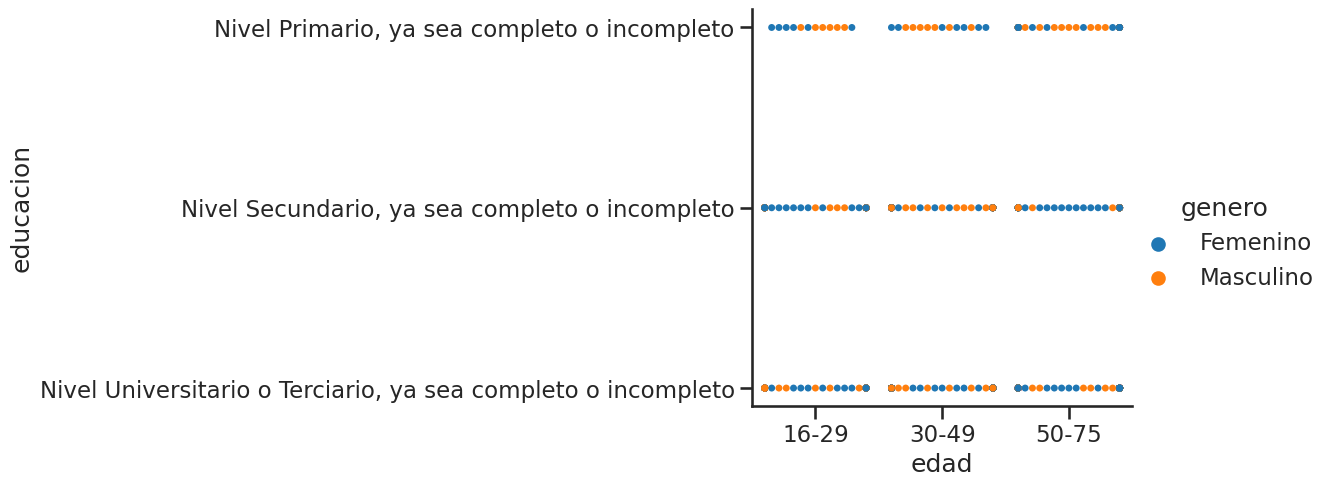

In [31]:
sns.catplot(data=caba2_df, y='educacion', x='edad', kind='swarm', hue='genero' )
plt.show()

Una tabla de contingencia entre las columnas de a quien voto y a quien votaria

In [47]:
pd.crosstab(caba2_df['votaria_ahora'] ,  caba2_df['voto_antes'])

voto_antes                                          10.0  En blanco  \
votaria_ahora                                                         
En blanco/ No votaría                                  1         12   
Gabriel Solano y Vilma Ripoll del Frente de Izq...     0          0   
Horacio Rodríguez Larreta y Gerardo Morales de ...     0          1   
Javier Milei y Victoria Villarruel de La Libert...     0          1   
Juan Grabois y Paula Abal Medina del Frente de ...     0          0   
Juan Schiaretti y Florencio Randazzo del Peroni...     0          5   
Myriam Bregman y Nicolás Del Caño del Frente de...     0          1   
No sabe / No contesta                                  0          1   
Otro. Detalle                                          0          2   
Patricia Bullrich y Luis Petri de Juntos por el...     0          3   
Sergio Massa y Agustín Rossi del Frente de Todo...     0          0   

voto_antes                                          Jorge Adaro del Frente de Izquierda  \
votaria_ahora                                                                             
En blanco/ No votaría                                                                 0   
Gabriel Solano y Vilma Ripoll del Frente de Izq...                                    1   
Horacio Rodríguez Larreta y Gerardo Morales de ...                                    0   
Javier Milei y Victoria Villarruel de La Libert...                                    0   
Juan Grabois y Paula Abal Medina del Frente de ...                                    1   
Juan Schiaretti y Florencio Randazzo del Peroni...                                    0   
Myriam Bregman y Nicolás Del Caño del Frente de...                                    4   
No sabe / No contesta                                                                 0   
Otro. Detalle                                                                         0   
Patricia Bullrich y Luis Petri de Juntos por el...                                    0   
Sergio Massa y Agustín Rossi del Frente de Todo...                                    0   

voto_antes                                          Jorge Macri de Juntos  \
votaria_ahora                                                               
En blanco/ No votaría                                                   6   
Gabriel Solano y Vilma Ripoll del Frente de Izq...                      0   
Horacio Rodríguez Larreta y Gerardo Morales de ...                     43   
Javier Milei y Victoria Villarruel de La Libert...                     20   
Juan Grabois y Paula Abal Medina del Frente de ...                      0   
Juan Schiaretti y Florencio Randazzo del Peroni...                      3   
Myriam Bregman y Nicolás Del Caño del Frente de...                      2   
No sabe / No contesta                                                   0   
Otro. Detalle                                                           1   
Patricia Bullrich y Luis Petri de Juntos por el...                    198   
Sergio Massa y Agustín Rossi del Frente de Todo...                      5   

voto_antes                                          Leandro Santoro del Frente de Todos/ Unión por la Patria.  \
votaria_ahora                                                                                                   
En blanco/ No votaría                                                                               2           
Gabriel Solano y Vilma Ripoll del Frente de Izq...                                                  0           
Horacio Rodríguez Larreta y Gerardo Morales de ...                                                  2           
Javier Milei y Victoria Villarruel de La Libert...                                                  3           
Juan Grabois y Paula Abal Medina del Frente de ...                                                 37           
Juan Schiaretti y Florencio Randazzo del Peroni...                                                 